In [2]:
import pandas as pd
import seaborn as sns
import geopandas as gdp
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

/opt/anaconda3/envs/ads/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


#### Parallel plot of income data

In [3]:
income_df = pd.read_csv('../data/raw/income_for_suburb.csv')
income_df = income_df.drop(columns='Unnamed: 0')
income_df.head()

,LOC_NAME,2011-12.3,2012-13.3,2013-14.3,2014-15.3,2015-16.3,2016-17.3,2017-18.3,2018-19.3,2019,2020,2021,2022,2023,2024
0,Abbotsford,50034.0,50558.0,51419.0,53987.0,57501.0,58359.0,61476.0,64090.0,66409.949224,68813.876673,71304.822215,73885.935758,76560.481231,79331.840710
1,Aberfeldie,50458.0,52097.0,53037.0,54683.0,56381.0,56597.0,59116.0,61204.0,62920.085721,64684.288398,66497.957172,68362.479013,70279.279779,72249.825306
2,Aintree,38711.0,39709.0,40111.0,38717.0,39657.0,43924.0,48697.0,51869.0,54142.564367,56515.785463,58993.031525,61578.862259,64278.037238,67095.524658
3,Airport West,45090.0,46837.0,48941.0,50094.0,52329.0,53575.0,55912.0,58506.0,60726.452293,63031.176428,65423.370737,67906.354937,70483.574736,73158.606615
4,Albanvale,38444.0,40266.0,40038.0,41211.0,41238.0,41394.0,43026.0,44383.0,45311.439040,46259.299910,47226.988890,48214.920761,49223.518980,50253.215862


In [17]:
income_df_sample

LOC_NAME,Bakery Hill,Foster,Kensington,Herne Hill,Airport West,Lang Lang,Manifold Heights,Narre Warren South,Tarwin Lower,Mount Dandenong,Mickleham,Thoona,Brooklyn,Mornington,Werribee South
2011-12.3,42890.000000,31121.000000,56037.000000,43216.000000,45090.000000,36914.000000,43216.000000,45152.333333,31121.000000,43554.000000,43348.000000,32287.000000,43188.000000,39066.000000,42007.000000
2012-13.3,45719.000000,29616.000000,58183.000000,45065.000000,46837.000000,37557.000000,45065.000000,46366.333333,29616.000000,43967.000000,44351.000000,31180.000000,44921.000000,40328.000000,43656.000000
2013-14.3,47061.000000,32280.000000,58469.000000,45997.000000,48941.000000,39052.000000,45997.000000,46553.666667,32280.000000,45393.000000,46189.000000,33541.000000,45191.000000,41659.000000,45060.000000
2014-15.3,47894.000000,33707.000000,59540.000000,47176.000000,50094.000000,41052.000000,47176.000000,47404.333333,33707.000000,46304.000000,48336.000000,34430.000000,47000.000000,43052.000000,46980.000000
2015-16.3,49564.000000,33109.000000,61221.000000,48563.000000,52329.000000,43407.000000,48563.000000,48173.666667,33109.000000,47550.000000,49981.000000,35335.000000,49643.000000,43504.000000,48154.000000
2016-17.3,50413.000000,33966.000000,63505.000000,50784.000000,53575.000000,44652.000000,50784.000000,48911.666667,33966.000000,48432.000000,51754.000000,35509.000000,51219.000000,44686.000000,50542.000000
2017-18.3,51736.000000,34854.000000,65563.000000,52867.000000,55912.000000,46281.000000,52867.000000,50015.333333,34854.000000,49421.000000,51369.000000,37975.000000,53368.000000,45608.000000,52000.000000
2018-19.3,53688.000000,37285.000000,67962.000000,55640.000000,58506.000000,48999.000000,55640.000000,51237.666667,37285.000000,51924.000000,53025.000000,38640.000000,56991.000000,48011.000000,54254.000000
2019,55444.244668,38296.135377,69865.589284,57688.367603,60726.452293,51026.840431,57688.367603,52174.023903,38296.135377,53248.135872,54580.660868,39667.318707,59303.144873,49449.523789,56275.344732
2020,57257.939704,39334.691828,71822.497367,59812.145159,63031.176428,53138.603733,59812.145159,53127.549319,39334.691828,54606.039093,56181.962109,40721.950657,61709.094274,50931.149174,58371.998834


<AxesSubplot:>

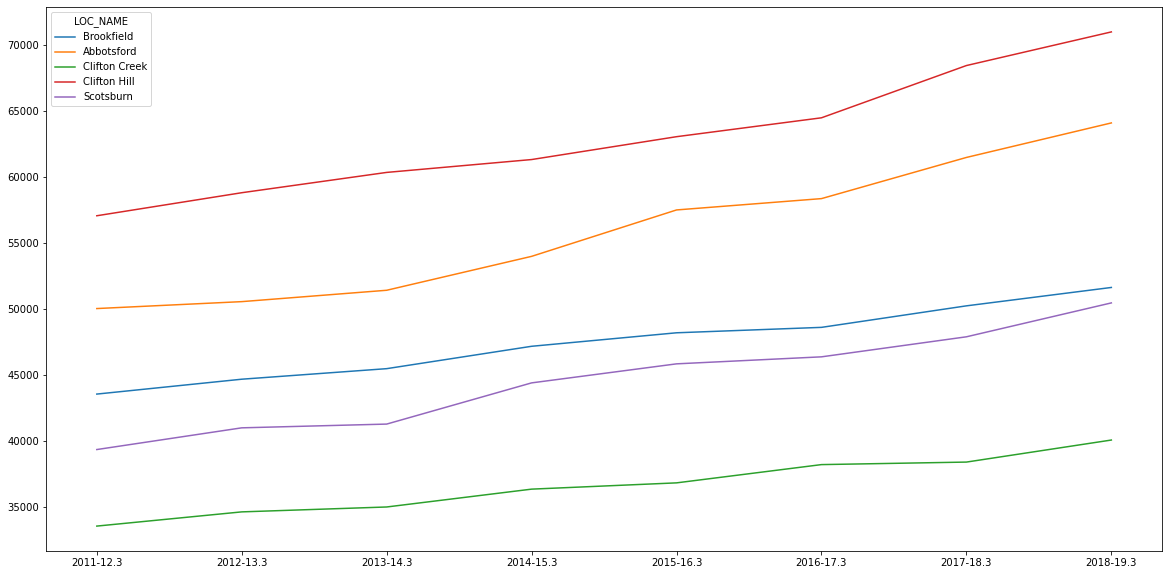

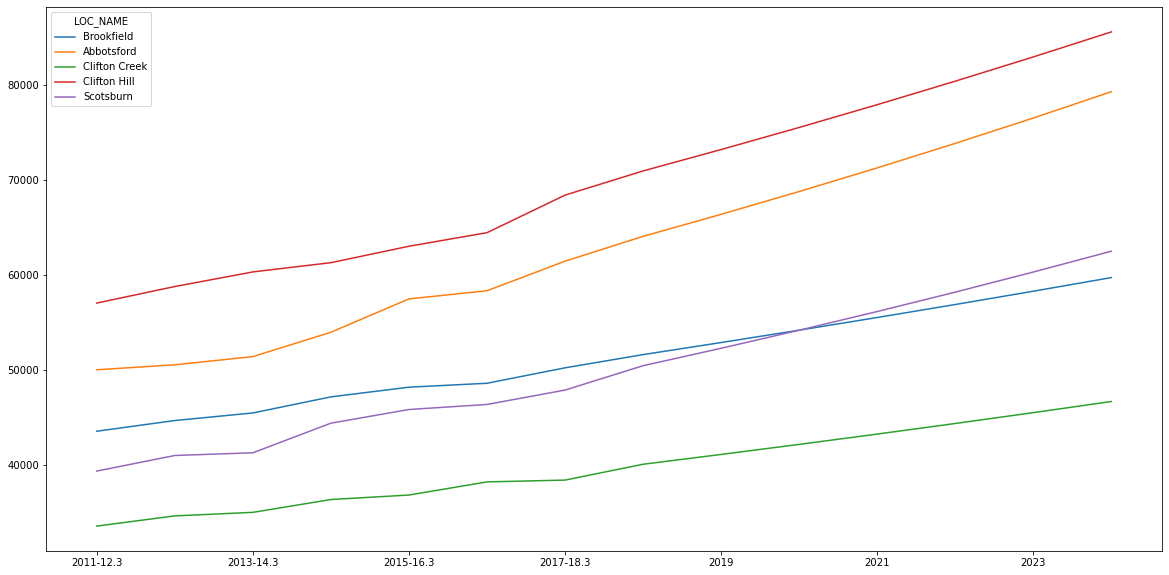

In [31]:
from pandas.plotting import parallel_coordinates
# fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(20,10))
income_df_sample = income_df.sample(n=5, random_state=150)
income_df_sample = income_df_sample.set_index(keys='LOC_NAME', drop=True).transpose()
income_df_sample.iloc[:8,:].plot.line(figsize=(20, 10))
income_df_sample.plot.line(figsize=(20, 10))

#### Piare plot of merged dataset

In [147]:
merged_data = pd.read_csv('../data/raw/property_merged.csv')
merged_data = merged_data.drop(columns='Unnamed: 0')
merged_data.head()

,name,cost,coordinates,type,address,beds,station_distance,CBD_distance,bath,parking,postcode,SA2_CODE,2022 pred,ERP 2021,density 2021 persons/km2,scaled_crime_rate
0,1901/368 St Kilda Road Melbourne VIC 3000,1800,"[-37.8318086, 144.9710272]",Apartment / Unit / Flat,1901/368 St Kilda Road Melbourne,3,1803.65,1702.19,2,2,3000,206041122,30531.488067,47192.0,19920.0,0.789795
1,1211/200 Spencer Street Melbourne VIC 3000,480,"[-37.816228, 144.9532465]",Apartment / Unit / Flat,1211/200 Spencer Street Melbourne,1,371.68,2267.13,1,1,3000,206041122,30531.488067,47192.0,19920.0,0.789795
2,1008/380 Little Lonsdale Street Melbourne VIC ...,400,"[-37.8121026, 144.9581291]",Apartment / Unit / Flat,1008/380 Little Lonsdale Street Melbourne,1,248.50,1937.39,1,0,3000,206041122,30531.488067,47192.0,19920.0,0.789795
3,3/27 Flinders Lane Melbourne VIC 3000,420,"[-37.8147317, 144.9733655]",Apartment / Unit / Flat,3/27 Flinders Lane Melbourne,1,404.26,790.13,1,0,3000,206041122,30531.488067,47192.0,19920.0,0.789795
4,611/408 Lonsdale Street Melbourne VIC 3000,350,"[-37.8125979, 144.9604012]",Apartment / Unit / Flat,611/408 Lonsdale Street Melbourne,1,525.08,1657.95,1,0,3000,206041122,30531.488067,47192.0,19920.0,0.789795


In [148]:
merged_data.dtypes

name                         object
cost                          int64
coordinates                  object
type                         object
address                      object
beds                          int64
station_distance            float64
CBD_distance                float64
bath                          int64
parking                       int64
postcode                      int64
SA2_CODE                      int64
2022 pred                   float64
ERP 2021                    float64
density 2021 persons/km2    float64
scaled_crime_rate           float64
dtype: object

In [149]:
numeric_variables = merged_data[['cost', 'station_distance', 'CBD_distance', '2022 pred', 'ERP 2021', 'density 2021 persons/km2']]
numeric_variables = numeric_variables[(np.abs(stats.zscore(numeric_variables['cost'])) < 2.5)]
numeric_variables = numeric_variables[(np.abs(stats.zscore(numeric_variables['station_distance'])) < 2.5)]
numeric_variables = numeric_variables[(np.abs(stats.zscore(numeric_variables['CBD_distance'])) < 2.5)]
numeric_variables = numeric_variables[(np.abs(stats.zscore(numeric_variables['2022 pred'])) < 2.5)]

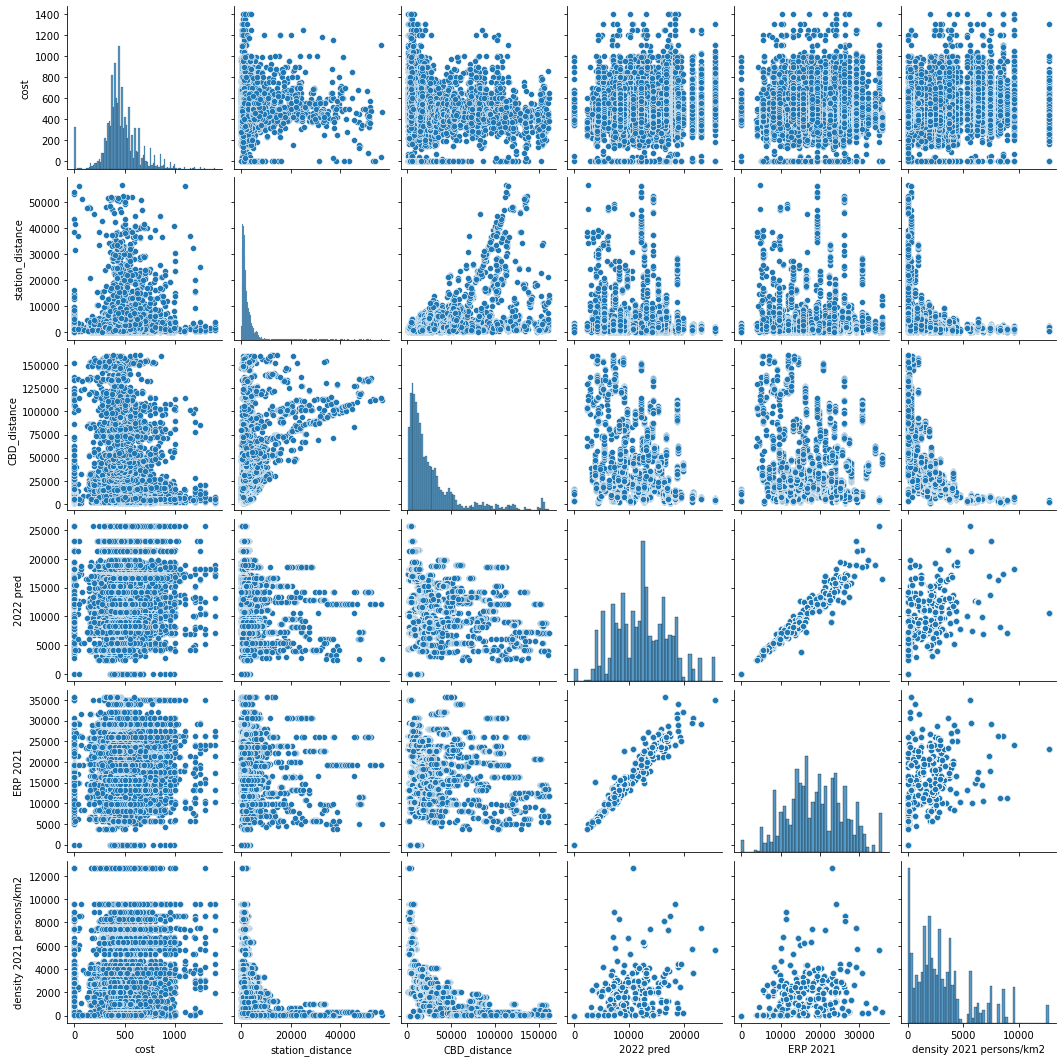

In [150]:
sns.pairplot(numeric_variables)

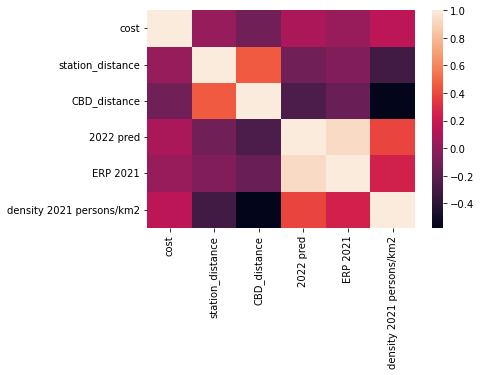

In [134]:
# flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(numeric_variables.corr())

In [151]:
numeric_variables.corr()

,cost,station_distance,CBD_distance,2022 pred,ERP 2021,density 2021 persons/km2
cost,1.000000,0.014312,-0.117342,0.086020,0.022223,0.154193
station_distance,0.014312,1.000000,0.452121,-0.120259,-0.063335,-0.306389
CBD_distance,-0.117342,0.452121,1.000000,-0.257596,-0.148442,-0.577694
2022 pred,0.086020,-0.120259,-0.257596,1.000000,0.927011,0.388161
ERP 2021,0.022223,-0.063335,-0.148442,0.927011,1.000000,0.242273
density 2021 persons/km2,0.154193,-0.306389,-0.577694,0.388161,0.242273,1.000000
